project CONVOLUTIONAL NEURAL NETWORK ON MULTIPLE DATASET BY MAUZUM SHAMIL

# import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,BatchNormalization,MaxPooling2D,Dropout
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical,plot_model
import os

# encoding and importing the folder

In [20]:
encoder = LabelEncoder()
encoder.fit(["cloudy","rainy","shine"])

LabelEncoder()

In [21]:
data = []
label = []
paths = []

for weather_folder in ["cloudy", "rainy", "shine"]:
    class_index = encoder.transform([weather_folder])[0]
    class_label = to_categorical(class_index, num_classes=3)

    for r, d, f in os.walk(os.path.join(r"C:\Users\dell\Desktop\weather dataset", weather_folder)):
        for file in f:
            if file.endswith(('.jpg', '.jpeg')):  # Check for image files with correct extensions
                paths.append(os.path.join(r, file))

    for path in paths:
        img = Image.open(path)
        img = img.resize((128, 128))
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(img)
            label.append(class_label)

data = np.array(data)
label = np.array(label)

print(data.shape)
print(label.shape)


(1573, 128, 128, 3)
(1573, 3)


In [22]:
# data = []
# label = []
# paths = []

# for weather_folder in ["cloudy","rainy","shine"]:
#     class_index = encoder.transform([weather_folder])[0]
#     class_label = to_categorical(class_index,num_classes=3)

# for r,d,f in os.walk(r"C:\Users\dell\Desktop\weather dataset" , weather_folder):
#     for file in f:
#         if '.jpg' or '.jpeg' in file:
#             paths.append(os.path.join(r,file))

# for path in paths:
#     img = Image.open(path)
#     img = img.resize((128,128))
#     img = np.array(img)
#     if img.shape==(128,128,3):
#         data.append(img)
#         label.append(class_label)

# data = np.array(data)
# label = np.array(label)

# print(data.shape)
# print(label.shape)


In [24]:
# labels = np.array(label)
labels = label.reshape((1573,-1))

In [26]:
labels.shape

(1573, 3)

# visualization

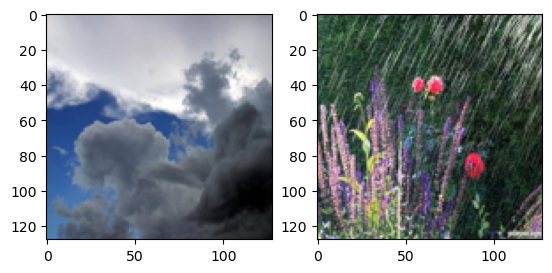

In [27]:
plt.subplot(1,2,1)
plt.imshow(data[100])
plt.subplot(1,2,2)
plt.imshow(data[700])

# splitting

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data,labels, test_size=0.2, shuffle=True, random_state=42)

# MODEL CREATION

In [29]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

print(model.summary())

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,115 (128.12 MB)

 Trainable params: 33,585,923 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


# model compilation

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
x_train.shape

(1258, 128, 128, 3)

In [32]:
x_test.shape

(315, 128, 128, 3)

In [33]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.4237 - loss: 34.2839
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.4303 - loss: 1.6589
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.4336 - loss: 1.1128
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.4667 - loss: 1.0129
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.4787 - loss: 0.9853
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.4836 - loss: 0.9944
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4814 - loss: 0.9704
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.4789 - loss: 1.0004
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4665 - loss: 0.9769
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.5116 - loss: 0.9494


In [34]:
score = model.evaluate(x_test,y_test,batch_size=64)
print(" the test accuracy: %.1f%%"%(100 * score[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 497ms/step - accuracy: 0.4047 - loss: 8.6463
 the test accuracy: 39.4%


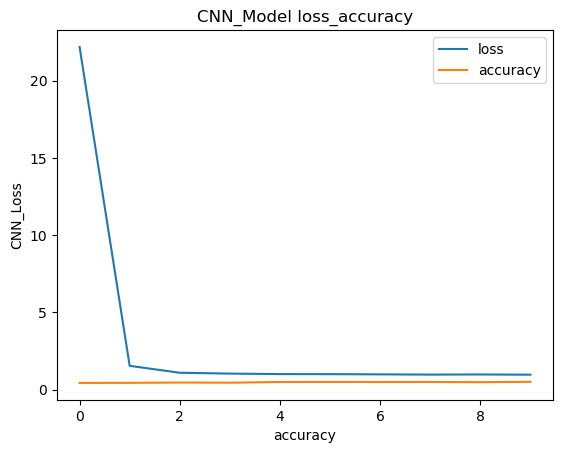

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('CNN_Model loss_accuracy')
plt.ylabel('CNN_Loss')
plt.xlabel('accuracy')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [47]:
def names(number):
    if number==0:
        return 'weather is cloudy'
    elif number==1:
        return 'weather is rainy'
    elif number==2:
        return 'weather is shine'
    else:
        return 'it cant detected'
        
    

0
weather is cloudy


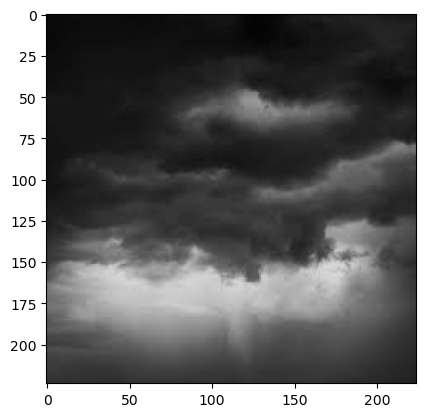

In [44]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\cloudy\cloudy67.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(classification)
print(names(classification))

weather is rainy


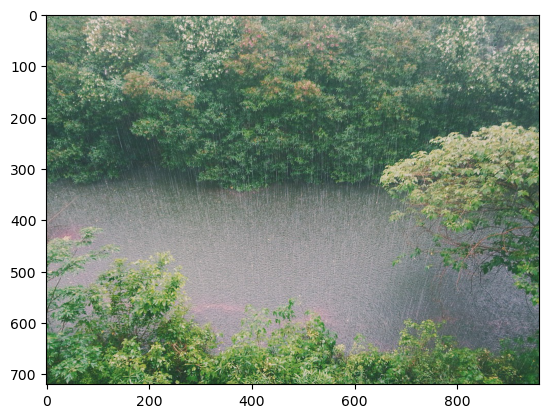

In [42]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\rainy\rain211.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

weather is shine


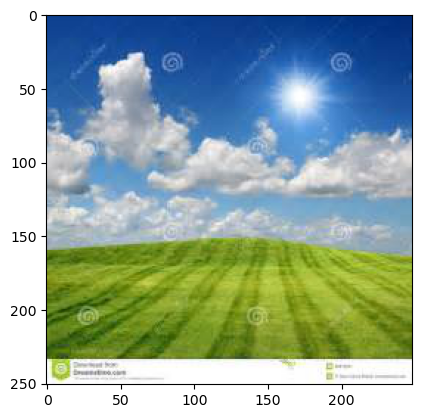

In [55]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\shine\shine211.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))